# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

## Note before starting: `ImageCleaner` does not work in JupyterLab, but it does work in Jupyter Notebook

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [1]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

The next thing we need to do is to get a list of all the URLs there. 

To do that, back in your google images, you hit <kbd>Ctrl</kbd> <kbd>Shift</kbd> <kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd> <kbd>Opt</kbd> <kbd>J</kbd> in Mac, and you paste the following into the window that appears:

``` javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

This is a Javascript console for those of you who haven't done any Javascript before. I hit enter and it downloads my file for me. So I would call this teddies.txt and press "Save". Okay, now I have a file containing URLs of teddies. Then I would repeat that process for black bears and for grizzly bears, and I put each one in a file with an appropriate name. 

<img src='https://raw.githubusercontent.com/hiromis/notes/master/lesson2/11.png'/>



# Create directory, upload urls file, Download images

Create directory `data/bears` and upload the url txt files (manually).

In [ ]:
path = Path('data/bears')
path.mkdir(parents=True, exist_ok=True)

I refectored Jeremey's code for downloading the images (below).

The dictionary format is `{foldername (class): urls filename}`

In [7]:
bear_dict = {
    'black': 'urls_black.txt',
    'teddys': 'urls_teddys.txt',
    'grizzly': 'urls_grizzly.txt'
}

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

Note: If you have problems download, try with `max_workers=0` to see exceptions:

`download_images(path/file, dest, max_pics=20, max_workers=0)`

In [6]:
for folder, file in bear_dict.items():
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)

Error https://www.washingtonpost.com/rf/image_1484w/2010-2019/WashingtonPost/2014/05/23/Interactivity/Images/Feeding_Bears-05501.jpg?t=20170517 HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error x-raw-image:///7c4160893771e928b68d94f8d0625a08c36d6234c1e008e7248bd3c0b57aa2cc No connection adapters were found for 'x-raw-image:///7c4160893771e928b68d94f8d0625a08c36d6234c1e008e7248bd3c0b57aa2cc'


Error https://www.giftportalbd.com/media/catalog/product/cache/1/image/604x779/c15baa66cb053baa2c37a0fa941c6661/c/u/cute-teddy-bear.jpg HTTPSConnectionPool(host='www.giftportalbd.com', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/image/604x779/c15baa66cb053baa2c37a0fa941c6661/c/u/cute-teddy-bear.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://cordonbleushop.com/wp-content/uploads/2017/11/Oso.jpg HTTPSConnectionPool(host='cordonbleushop.com', port=443): Read timed out. (read timeout=4)
Error https://www.sendah.com/988-thickbox_default/daydream-white-teddy-bear.jpg HTTPSConnectionPool(host='www.sendah.com', port=443): Max retries exceeded with url: /988-thickbox_default/daydream-white-teddy-bear.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://poste

Error https://blog.patagonia.com/wp-content/uploads/2018/04/gnam_s_0089_1600TCL-1404x778-c-default.jpg HTTPSConnectionPool(host='blog.patagonia.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/04/gnam_s_0089_1600TCL-1404x778-c-default.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'blog.patagonia.com' doesn't match either of '*.wpengine.com', 'wpengine.com'")))
Error https://www.indianz.com/News/2017/06/30/yellowstonegrizzlycub.jpg HTTPSConnectionPool(host='www.indianz.com', port=443): Max retries exceeded with url: /News/2017/06/30/yellowstonegrizzlycub.jpg (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')")))
Error https://www.washingtonpost.com/resizer/3XR_4pCQML_c_PWsg5ByKcFsJow=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AUEKO7HTGII6RGOCZ7FG7T3BBQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


Then we can remove any images that can't be opened:

In [8]:
# this will iterate thru the dict keys only (our class names)

for c in bear_dict:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

black


cannot identify image file <_io.BufferedReader name='data/bears/black/00000187.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000063.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000097.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000057.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


cannot identify image file <_io.BufferedReader name='data/bears/black/00000146.jpg'>
int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/bears/black/00000008.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000119.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000160.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000108.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000059.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000017.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000005.jpg'>
teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000163.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000002.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000056.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000109.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000100.jpg'>
grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000162.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000189.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000171.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000066.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000086.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000164.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000198.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000098.jpg'>


## View data

In some cases, if you have a prepared data set, there will already be folders for train, valid, and test.

We only have one folder (per class) with all of our images

In [4]:
# If you already cleaned your data, run this cell instead of the following cell

# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
np.random.seed(42) # repeatable results when running this later

data = ImageDataBunch.from_folder(path, train=".", # training set in current folder
                                  valid_pct=0.2,   # make validation set from 20% of data (randomly)
                                  ds_tfms=get_transforms(), 
                                  size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [10]:
data.classes

['black', 'grizzly', 'teddys']

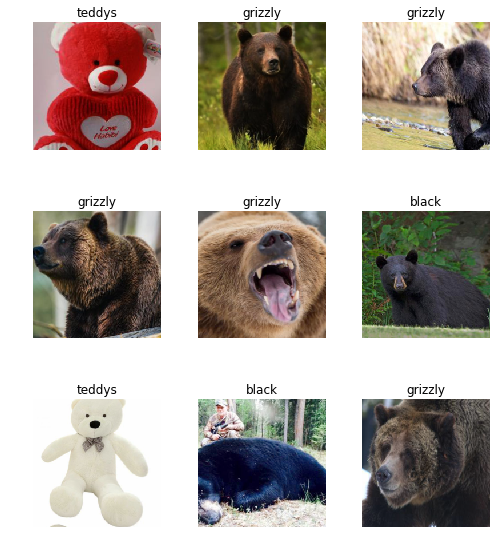

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 444, 111)

## Train model

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.058459,0.288866,0.108108,00:05
1,0.593225,0.208038,0.117117,00:03
2,0.422139,0.213151,0.099099,00:03
3,0.324585,0.213164,0.090090,00:03


In [16]:
learn.save('res34-stage-1')

In [23]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


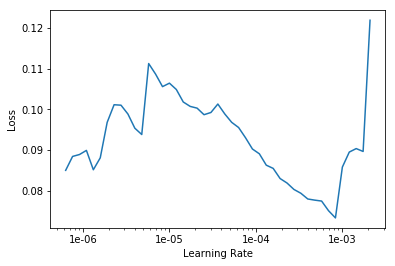

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(6, max_lr=slice(1e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.077358,0.212538,0.099099,00:04
1,0.095237,0.214308,0.072072,00:04
2,0.083030,0.242375,0.072072,00:04
3,0.071616,0.224007,0.081081,00:04
4,0.064068,0.219330,0.081081,00:04
5,0.057990,0.206739,0.081081,00:04


In [27]:
learn.save('res34-stage-2')

## Interpretation

In [9]:
learn.load('res34-stage-2');

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

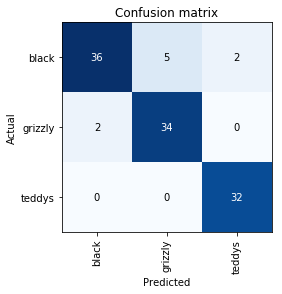

In [37]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

## ImageCleaner does not work in JupyterLab, but it does work in Jupyter Notebook

In [30]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `DatasetFormatter().from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

You then need to rerun these steps replacing `Valid` with `Train` to clean up your training set to get the noise out of that as well. So it's a good practice to do both. We'll talk about test sets later as well, if you also have a test set, you would then repeat the same thing. 

What I tend to do when I do this is I'll keep going confirm until I get to a couple of screen-fulls of the things that all look okay and that suggests to me that I've got past the worst bits of the data. So that's it so now you can go back for the training set as well and retrain your model. 

In [31]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [36]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

### Now do the Training Set:

In [38]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

In [39]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

# You can also find duplicates in your dataset and delete them! 

To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [41]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [42]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

### Now do the Training Set:

In [43]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)

In [44]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

---

Let's do some more training on the cleaned data:

In [45]:
np.random.seed(42)

data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [53]:
data

ImageDataBunch;

Train: LabelList (356 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: data/bears;

Valid: LabelList (88 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,black,black,grizzly,black
Path: data/bears;

Test: None

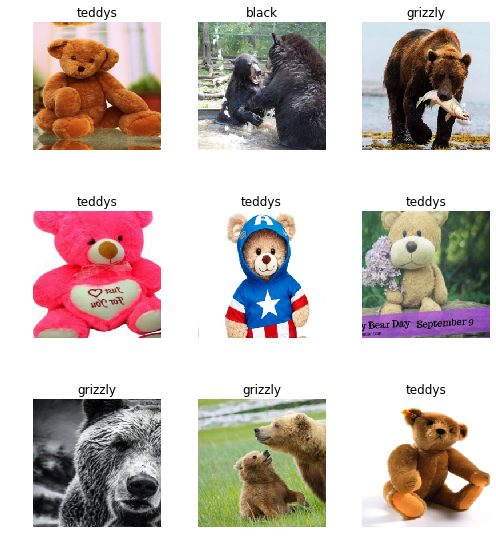

In [50]:
data.show_batch(rows=3, figsize=(7,8))

In [46]:
learn.data = data

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


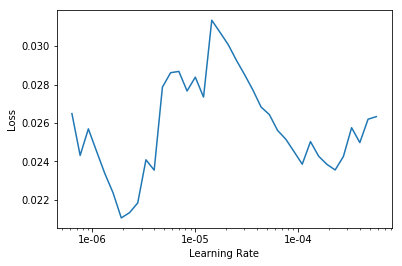

In [48]:
learn.recorder.plot()

In [49]:
learn.fit_one_cycle(3, max_lr=slice(3e-7,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.044860,0.008489,0.000000,00:04
1,0.039649,0.008534,0.000000,00:04
2,0.030779,0.008309,0.000000,00:04


#### I'm not sure why there is no error anymore ...??

I suspect there are duplicates between the train and valid sets


---

## Putting your model in production

At this point, we're ready to put our model in production and this is where I hear a lot of people ask me about which mega Google Facebook highly distributed serving system they should use and how do they use a thousand GPUs at the same time. For the vast majority of things you all do, you will want to actually run in production on a CPU, not a GPU. Why is that? Because GPU is good at doing lots of things at the same time, but unless you have a very busy website, it's pretty unlikely that you're going to have 64 images to classify at the same time to put into a batch into a GPU. And if you did, you've got to deal with all that queuing and running it all together, all of your users have to wait until that batch has got filled up and run﹣it's whole a lot of hassle. Then if you want to scale that, there's another whole lot of hassle. 

It's much easier if you just wrap one thing, throw it at a CPU to get it done, and comes back again. Yes, it's going to take maybe 10 or 20 times longer so maybe it'll take 0.2 seconds rather than 0.01 seconds. That's about the kind of times we are talking about. But it's so easy to scale. You can chuck it on any standard serving infrastructure. It's going to be cheap, and you can horizontally scale it really easily.  So most people I know who are running apps that aren't at Google scale, based on deep learning are using CPUs. 

And the term we use is "inference". When you are not training a model but you've got a trained model and you're getting it to predict things, we call that inference. That's why we say here:

> You probably want to use CPU for inference

First thing first, let's export the content of our `Learner` object for production:

In [12]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [ ]:
defaults.device = torch.device('cpu')

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [54]:
path

PosixPath('data/bears')

In [55]:
path.ls()

[PosixPath('data/bears/cleaned.csv'),
 PosixPath('data/bears/urls_teddys.txt'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/urls_grizzly.txt'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/urls_black.txt')]

In [17]:
learn = load_learner(path)

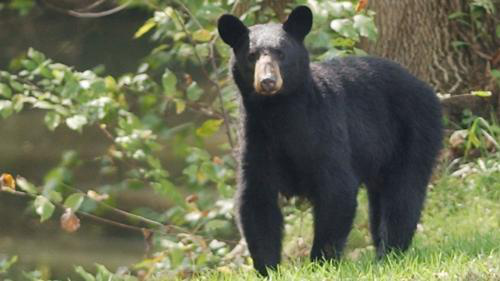

In [15]:
img = open_image(path/'black'/'00000021.jpg')
img

In [21]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

# Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

The validation loss will be very high

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:13
epoch  train_loss  valid_loss  error_rate       
1      12.220007   1144188288.000000  0.765957    (00:13)



### Learning rate (LR) too low

The error rate will not decrease very quickly. Try increasing LR by factor of 10. <br>
In addition to taking a really long time, it's getting too many looks/passes at each image, so may overfit.

Training loss should not be higher than valid loss. That means you have not fit enough. Either LR or num epochs too low

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:07
epoch  train_loss  valid_loss  error_rate
1      1.349151    1.062807    0.609929    (00:13)
2      1.373262    1.045115    0.546099    (00:13)
3      1.346169    1.006288    0.468085    (00:13)
4      1.334486    0.978713    0.453901    (00:13)
5      1.320978    0.978108    0.446809    (00:13)



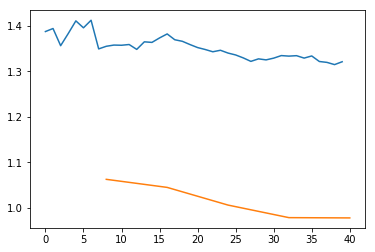

In [ ]:
learn.recorder.plot_losses()

### Too few epochs

Similar to too low LR

Train more <br>
Increase LR (but don't let the loss get too high)

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [ ]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      0.602823    0.119616    0.049645    (00:14)



### Too many epochs

You can overfit to the training set.

The error rate will start to get worse. 

If it improves, you're not overfitting

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 06:39
epoch  train_loss  valid_loss  error_rate
1      1.513021    1.041628    0.507326    (00:13)
2      1.290093    0.994758    0.443223    (00:09)
3      1.185764    0.936145    0.410256    (00:09)
4      1.117229    0.838402    0.322344    (00:09)
5      1.022635    0.734872    0.252747    (00:09)
6      0.951374    0.627288    0.192308    (00:10)
7      0.916111    0.558621    0.184982    (00:09)
8      0.839068    0.503755    0.177656    (00:09)
9      0.749610    0.433475    0.144689    (00:09)
10     0.678583    0.367560    0.124542    (00:09)
11     0.615280    0.327029    0.100733    (00:10)
12     0.558776    0.298989    0.095238    (00:09)
13     0.518109    0.266998    0.084249    (00:09)
14     0.476290    0.257858    0.084249    (00:09)
15     0.436865    0.227299    0.067766    (00:09)
16     0.457189    0.236593    0.078755    (00:10)
17     0.420905    0.240185    0.080586    (00:10)
18     0.395686    0.255465    0.082418    (00:09)
19     0.373232    0.2